# Linear Regression example with Tensorflow

In [1]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt

# learning_rate will determine the rate at which model get trained with data
# training_epochs is the number which determines number of iternations in training

In [2]:
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [3]:
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

# X features
# y labels

In [4]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")


# Initializing slope and intercept randomly

In [6]:
# Set model weights
W = tf.Variable(numpy.random.randn(), name="weight")
b = tf.Variable(numpy.random.randn(), name="bias")

# Constructing a lienar model

In [7]:
# Construct a linear model (y = mX+c)
pred = tf.add(tf.multiply(X, W), b)

In [8]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)

# modifying weights and bias to minimize cost(mean square error)


In [9]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# initializing varaibles

In [10]:
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.120036125 W= 0.133961 b= 1.63332
Epoch: 0100 cost= 0.115077510 W= 0.140839 b= 1.58384
Epoch: 0150 cost= 0.110690847 W= 0.147307 b= 1.53731
Epoch: 0200 cost= 0.106810167 W= 0.15339 b= 1.49355
Epoch: 0250 cost= 0.103376836 W= 0.159111 b= 1.45239
Epoch: 0300 cost= 0.100339182 W= 0.164493 b= 1.41368
Epoch: 0350 cost= 0.097651541 W= 0.169554 b= 1.37726
Epoch: 0400 cost= 0.095273681 W= 0.174314 b= 1.34302
Epoch: 0450 cost= 0.093169861 W= 0.178792 b= 1.31081
Epoch: 0500 cost= 0.091308370 W= 0.183003 b= 1.28051
Epoch: 0550 cost= 0.089661367 W= 0.186964 b= 1.25202
Epoch: 0600 cost= 0.088204101 W= 0.190689 b= 1.22522
Epoch: 0650 cost= 0.086914927 W= 0.194192 b= 1.20002
Epoch: 0700 cost= 0.085774310 W= 0.197487 b= 1.17632
Epoch: 0750 cost= 0.084765039 W= 0.200586 b= 1.15403
Epoch: 0800 cost= 0.083871938 W= 0.2035 b= 1.13306
Epoch: 0850 cost= 0.083081663 W= 0.206241 b= 1.11334
Epoch: 0900 cost= 0.082382374 W= 0.208819 b= 1.09479
Epoch: 0950 cost= 0.081763566 W= 0.211244 b= 1.07

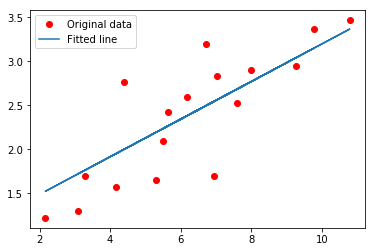

Testing... (Mean square loss Comparison)
Testing cost= 0.0909747
Absolute mean square loss difference: 0.00975875


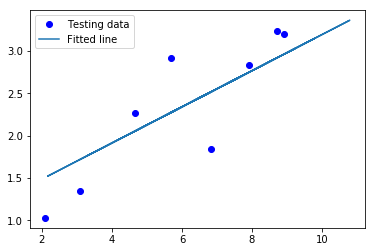

In [11]:
# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    # Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

    # Testing example, as requested (Issue #2)
    test_X = numpy.asarray([6.83, 4.668, 8.9, 7.91, 5.7, 8.7, 3.1, 2.1])
    test_Y = numpy.asarray([1.84, 2.273, 3.2, 2.831, 2.92, 3.24, 1.35, 1.03])

    print("Testing... (Mean square loss Comparison)")
    testing_cost = sess.run(
        tf.reduce_sum(tf.pow(pred - Y, 2)) / (2 * test_X.shape[0]),
        feed_dict={X: test_X, Y: test_Y})  # same function as cost above
    print("Testing cost=", testing_cost)
    print("Absolute mean square loss difference:", abs(
        training_cost - testing_cost))

    plt.plot(test_X, test_Y, 'bo', label='Testing data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()